In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import gamma, iv
%matplotlib inline

In [21]:
def Cg(T, E=1):
    
    tls = 1 + (T**2 * E**2)
    
    A = np.pi * np.exp((-T**2 / 2.) * (1 - T**2 * E**2 / 2. / tls))
    A = A / gamma(3 / 2)

    B = (T**2 * E / tls)**(1 / 2)

    L = iv(-1 / 4, T**4 * E**2 / 4 / tls)

    return A * B * L

In [12]:
def CgU(u, T, E):
    return 0.5 * (Cg(T, E * np.sqrt((1 - u) / (1 + u))) + Cg(T, E * np.sqrt((1 + u) / (1 - u))))

In [22]:
def fig_example(xmax=10, ymax=10, N=20, u=0.2, label_levels=[0.15, 0.25, 0.5, 1, 2], diff=False):
    
    x = np.linspace(0.01, xmax, N)
    y = np.linspace(0.01, ymax, N)
    xv, yv = np.meshgrid(x, y)
    
    z0 = Cg(T=xv, E=yv)
    z = CgU(T=xv, E=yv, u=u) if u > 0 else z0
    if diff:
        z = z - z0
    vmin = z.min()
    vmax = z.max()
    
    levels = np.linspace(vmin, vmax, 120)
    ticks = np.round(np.linspace(np.ceil(100 * vmin) / 100, np.floor(100 * vmax) / 100., 10), 2)
    
    fig, plot = plt.subplots()
    cpf = plot.contourf(x, y, z, cmap=plt.cm.plasma, vmin=vmin, vmax=vmax, levels=levels)
    cbar = fig.colorbar(cpf, ticks=ticks)
    cp = plot.contour(x, y, z, colors=['black' for _ in cpf.levels], vmin=vmin, vmax=vmax, levels=label_levels)
    plot.clabel(cp, fontsize=10)

    plot.set_xlabel(r'$\Omega T$')
    plot.set_ylabel(r'$E/\Omega$')

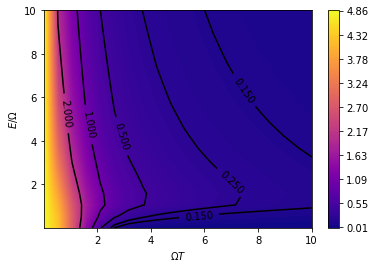

In [27]:
fig_example(u=0.)

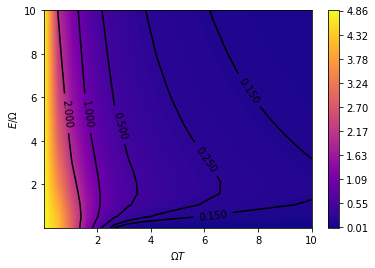

In [28]:
fig_example(u=0.5)

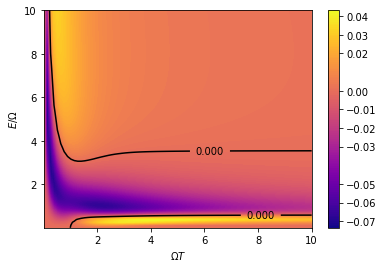

In [26]:
fig_example(u=0.4, N=80, label_levels=[0], diff=True)